<a href="https://colab.research.google.com/github/jinsusong/study-pytorch-DL/blob/main/PyTorch%EB%A1%9C_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###파이토치로 선형 회귀 구현하기 


https://wikidocs.net/53560

### 파이토치의 도구들을 임포트하는 기본 셋팅을 진행

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim 



In [ ]:
# 현재 실습하고 있는 파이썬 코드를 재실행해도 다음에도 같은 결과가 나오도록 랜덤 시드를 준다. 
torch.manual_seed(1)

### 실습을 위한 기본적인 셋팅은 끝났고, 다음으로 훈련 데이터인 x_train과 y_train을 선언한다. 

In [ ]:
#변수 선언 
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[5]])



In [ ]:
# x_train과 y_train의 크기를 출력해본다.
print(x_train)
print(x_train.shape)

In [ ]:
# x_train의 값이 출력되고 , x_train의 크기가 (3 x 1)임을 알 수 있다. 
# y_train과 y_train의 크기를 출력해본다. 
print(y_train)
print(y_train.shape)

In [ ]:
#y_train의 값이 출력되고 , y_train의 크기가 (3 x 1) 임을 알 수 있다. 


### 가중치와 편향의 초기화 

- 선형 회귀란 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 일 
- 가장 잘 맞는 직선을 정의하는 것이 바로 W와 b이다. 
- 선형 회귀의 목표는 가장 잘 맞는 직선을 정의하는 W와 b를 찾는 것 


In [ ]:
# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시함. 
W = torch.zeros(1, requires_grad=True)
# 가중치 W를 출력
print(W)

- 가중치 W가 0으로 초기화됨.
- requires_grad=True : 이 변수는 학습을 통해 계속 값이 변경되는 변수임을 의미 
- 마찬가지로 편향 b도 0으로 초기화하고, 학습을 통해 값이 변경되는 변수임을 명시함.

In [ ]:
b = torch.zeros(1, requires_grad=True)
print(b)


- 현재 가중치 W와 b 둘 다 0 이므로 현 직선의 방정식은 다음과 같다. 
- y = 0 * x + 0
- 지금 상태에서 x에 어떤 값이 들어가도 가설은 0을 예측하게 된다.
- 즉, 아직 적절한 W와 b가 아니다.

###  가설 세우기 


- 파이토치 코드 상으로 직선의 방정식에 해당되는 가설을 선언한다.
- H(x) = Wx + b 


In [ ]:
hypothesis = x_train * W + b 
print(hypothesis)

### 비용 함수 선언하기 

- 파이토치 코드 상으로 선형 회귀의 비용 함수에 해당되는 평균 제곱 오차를 선언한다. 


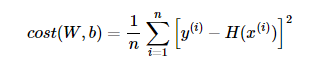

In [ ]:
# torch.mean으로 평균을 구한다. 
cost = torch.mean((hypothesis - y_train)**2)
print(cost)

### 경사 하강법 구현하기 

- 경사 하강법을 구현한다. 
- SGD는 경사 하강법의 일종
- lr은 학습률(learning rate)를 의미 
- 학습 대상인 W와 b가 SGD의 입력이 된다 .

In [ ]:
optimizer = optim.SGD([W, b], lr=0.01)

- optimizer.zero_grad()를 실행하므로서 미분을 통해 얻은 기울기를 0으로 초기화한다.
- 기울기를 초기화해야만 새로운 가중치 편향에 대해서 새로운 기울기를 구할 수 있다.
- 그 다음 cost.backward() 함수를 호출하면 가중치 W와 편향 b에 대한 기울기가 계산된다. 
- 그 다음 경사 하강법 최적화 함수 optimizer의 .step() 함수를 호출하여 인수로 들어갔던 W와 b에서 리턴되는 변수들의 기울기에 학습률 0.01을 곱하여 빼줌으로서 업데이트를 한다. 


In [ ]:
# gradient를 0으로 초기화 
optimizer.zero_grad()
# 비용 함수를 미분하여 gradient 계산
cost.backward()
# W와 b를 업데이트
optimizer.step()



- requires_grad=True 와 backward()에 대한 정리는 자동 미분(Autograd)에 별도 정리

### 전체 코드 

In [ ]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1999 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

- 결과적으로 훈련 과정에서 와 는 훈련 데이터와 잘 맞는 직선을 표현하기 위한 적절한 값으로 변화한다.

- 에포크(Epoch)는 전체 훈련 데이터가 학습에 한 번 사용된 주기를 말한다.
- 이번 실습의 경우 2,000번을 수행했습니다.

- 최종 훈련 결과를 보면 최적의 기울기 W는 2에 가깝고, b는 0에 가까운 것을 볼 수 있습니다.
- 현재 훈련 데이터가 x_train은 [[1], [2], [3]]이고 y_train은 [[2], [4], [6]]인 것을 감안하면
- 실제 정답은 가 2이고, 가 0인 이므로 거의 정답을 찾은 셈입니다.